# Ethereum Data

At this point, I start to explore the **Ethereum** Data. The table on Ethereum contains the:

- USD opening price, 
- Total Volume, 
- Snapshot time, and 
- Market Capitalization

First, we inspect the description of the data. I'll analyse the MEAN, median, range, and standard deviation of the price column.

In [38]:
-- Market Cap and Total Volume in Billions of Dollars, and Price
SELECT 
	price, 
	market_cap/1000000000 AS billions_mcap, 
	total_volume/1000000000 AS billions_volume 
 FROM 'eth-usd-max.csv';

,price,billions_mcap,billions_volume
0,2.831620,0.000000,0.000091
1,1.330750,0.080339,0.000368
2,0.687586,0.041556,0.000400
3,1.067379,0.064539,0.001519
4,1.256613,0.076013,0.002074
...,...,...,...
3192,3102.151292,373.187732,13.929438
3193,3115.023322,374.188249,8.430889
3194,3136.575110,376.477228,8.027547
3195,3064.591400,368.312963,13.196103


In [39]:
-- Summary/Desctiptive Statistics of Ethereum Daily Price 
SELECT 
	ROUND(AVG(price),2) AS mean, 
	ROUND(MIN(price),2) AS min_price, 
	ROUND(MAX(price),2) AS max_price, 
	ROUND(STDDEV(price),2) AS stddev, 
	ROUND(PERCENTILE_CONT(0.50) 
		  WITHIN GROUP (ORDER BY price),2) AS median
 FROM 'eth-usd-max.csv' 

,mean,min_price,max_price,stddev,median
0,1008.01,0.43,4815.0,1148.61,379.12


In [40]:
-- Summary/Desctiptive Statistics of Ethereum Daily Market Capitalization

SELECT 
	ROUND(AVG(market_cap),2) AS mean, 
	ROUND(MIN(market_cap),2) AS min_mcap, 
	ROUND(MAX(market_cap),2) AS max_mcap, 
	ROUND(STDDEV(market_cap),2) AS stddev, 
	ROUND(PERCENTILE_CONT(0.50) 
		  WITHIN GROUP (ORDER BY market_cap),2) AS median
 FROM 'eth-usd-max.csv'

,mean,min_mcap,max_mcap,stddev,median
0,1.177786e+11,0.0,5.716658e+11,1.375925e+11,4.085157e+10


In [41]:
-- Summary/Desctiptive Statistics of Ethereum Daily Trading Volume
SELECT 
	ROUND(AVG(total_volume),2) AS mean, 
	ROUND(MIN(total_volume),2) AS min_vol, 
	ROUND(MAX(total_volume),2) AS max_vol, 
	ROUND(STDDEV(total_volume),2) AS stddev, 
	ROUND(PERCENTILE_CONT(0.50) 
		  WITHIN GROUP (ORDER BY total_volume),2) AS median
 FROM 'eth-usd-max.csv'

,mean,min_vol,max_vol,stddev,median
0,9.815034e+09,87074.8,1.409065e+11,1.220279e+10,6.883712e+09


In [42]:
-- Time-series Analysis of Average Daily Price, Market Cap, and Trading Volume Aggregated Weekly
SELECT 
	date_trunc('week', snapped_at) AS week, 
	AVG(market_cap) AS avg_$mcap, 
	AVG(total_volume) AS avg_$vol, 
	AVG(price) AS avg_$price
 FROM 'eth-usd-max.csv' 
GROUP BY 1
ORDER BY 1

,week,avg_$mcap,avg_$vol,avg_$price
0,2015-08-03 00:00:00+00:00,4.016974e+07,2.293460e+05,2.081185
1,2015-08-10 00:00:00+00:00,8.483270e+07,2.611630e+06,1.401501
2,2015-08-17 00:00:00+00:00,9.712413e+07,1.764172e+06,1.337774
3,2015-08-24 00:00:00+00:00,8.677059e+07,8.501107e+05,1.192331
4,2015-08-31 00:00:00+00:00,9.530801e+07,5.747041e+05,1.307017
...,...,...,...,...
453,2024-04-08 00:00:00+00:00,4.112894e+11,1.855092e+10,3424.025294
454,2024-04-15 00:00:00+00:00,3.708547e+11,1.921814e+10,3086.854559
455,2024-04-22 00:00:00+00:00,3.860717e+11,1.230378e+10,3178.997104
456,2024-04-29 00:00:00+00:00,3.757463e+11,1.487410e+10,3096.222216


,week,avg_$mcap,avg_$vol,avg_$price
0,2015-08-03 00:00:00+00:00,4.016974e+07,2.293460e+05,2.081185
1,2015-08-10 00:00:00+00:00,8.483270e+07,2.611630e+06,1.401501
2,2015-08-17 00:00:00+00:00,9.712413e+07,1.764172e+06,1.337774
3,2015-08-24 00:00:00+00:00,8.677059e+07,8.501107e+05,1.192331
4,2015-08-31 00:00:00+00:00,9.530801e+07,5.747041e+05,1.307017
...,...,...,...,...
453,2024-04-08 00:00:00+00:00,4.112894e+11,1.855092e+10,3424.025294
454,2024-04-15 00:00:00+00:00,3.708547e+11,1.921814e+10,3086.854559
455,2024-04-22 00:00:00+00:00,3.860717e+11,1.230378e+10,3178.997104
456,2024-04-29 00:00:00+00:00,3.757463e+11,1.487410e+10,3096.222216


,week,avg_$mcap,avg_$vol,avg_$price
0,2015-08-03 00:00:00+00:00,4.016974e+07,2.293460e+05,2.081185
1,2015-08-10 00:00:00+00:00,8.483270e+07,2.611630e+06,1.401501
2,2015-08-17 00:00:00+00:00,9.712413e+07,1.764172e+06,1.337774
3,2015-08-24 00:00:00+00:00,8.677059e+07,8.501107e+05,1.192331
4,2015-08-31 00:00:00+00:00,9.530801e+07,5.747041e+05,1.307017
...,...,...,...,...
453,2024-04-08 00:00:00+00:00,4.112894e+11,1.855092e+10,3424.025294
454,2024-04-15 00:00:00+00:00,3.708547e+11,1.921814e+10,3086.854559
455,2024-04-22 00:00:00+00:00,3.860717e+11,1.230378e+10,3178.997104
456,2024-04-29 00:00:00+00:00,3.757463e+11,1.487410e+10,3096.222216


,week,avg_$mcap,avg_$vol,avg_$price
0,2015-08-03 00:00:00+00:00,4.016974e+07,2.293460e+05,2.081185
1,2015-08-10 00:00:00+00:00,8.483270e+07,2.611630e+06,1.401501
2,2015-08-17 00:00:00+00:00,9.712413e+07,1.764172e+06,1.337774
3,2015-08-24 00:00:00+00:00,8.677059e+07,8.501107e+05,1.192331
4,2015-08-31 00:00:00+00:00,9.530801e+07,5.747041e+05,1.307017
...,...,...,...,...
453,2024-04-08 00:00:00+00:00,4.112894e+11,1.855092e+10,3424.025294
454,2024-04-15 00:00:00+00:00,3.708547e+11,1.921814e+10,3086.854559
455,2024-04-22 00:00:00+00:00,3.860717e+11,1.230378e+10,3178.997104
456,2024-04-29 00:00:00+00:00,3.757463e+11,1.487410e+10,3096.222216


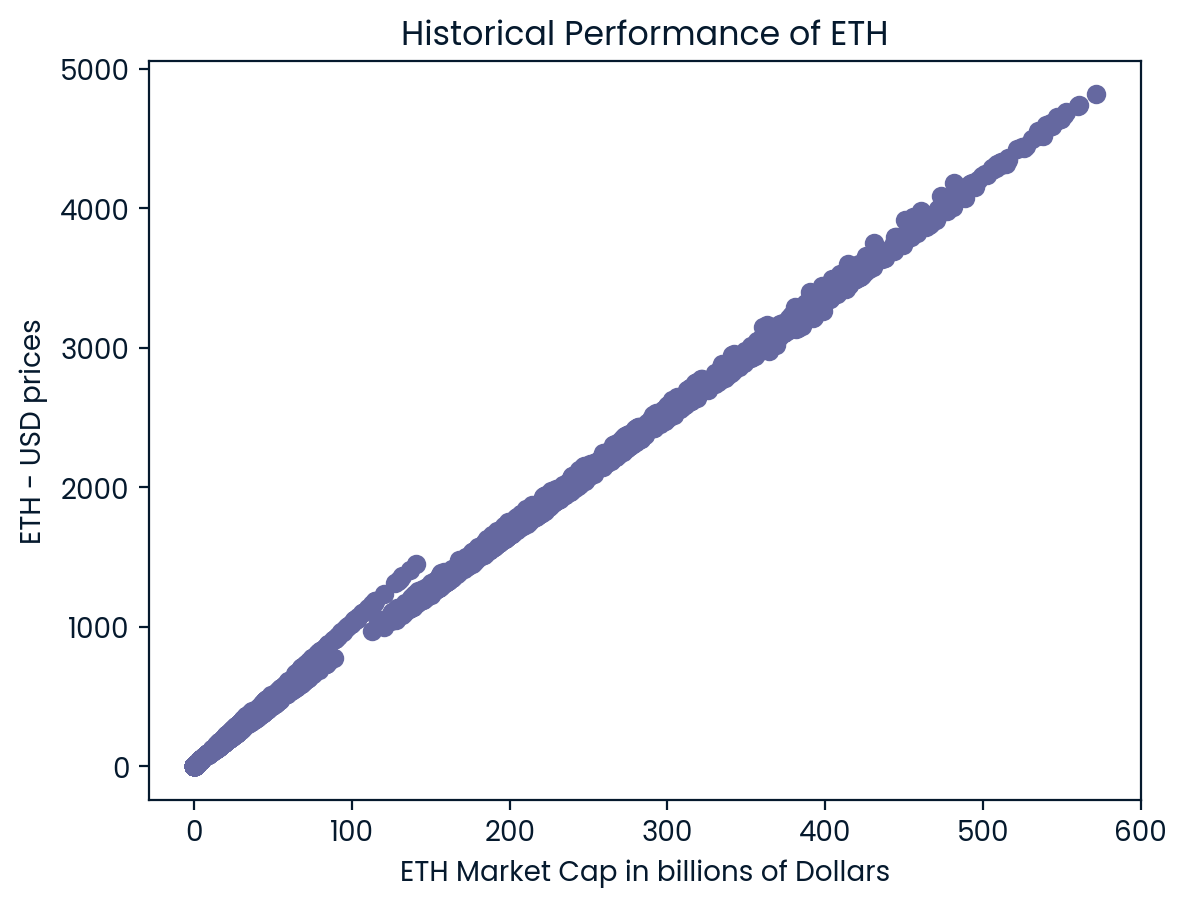

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df['billions_mcap'], df['price'])
plt.xlabel('ETH Market Cap in billions of Dollars')
plt.ylabel('ETH - USD prices')
plt.title('Historical Performance of ETH')
plt.show()

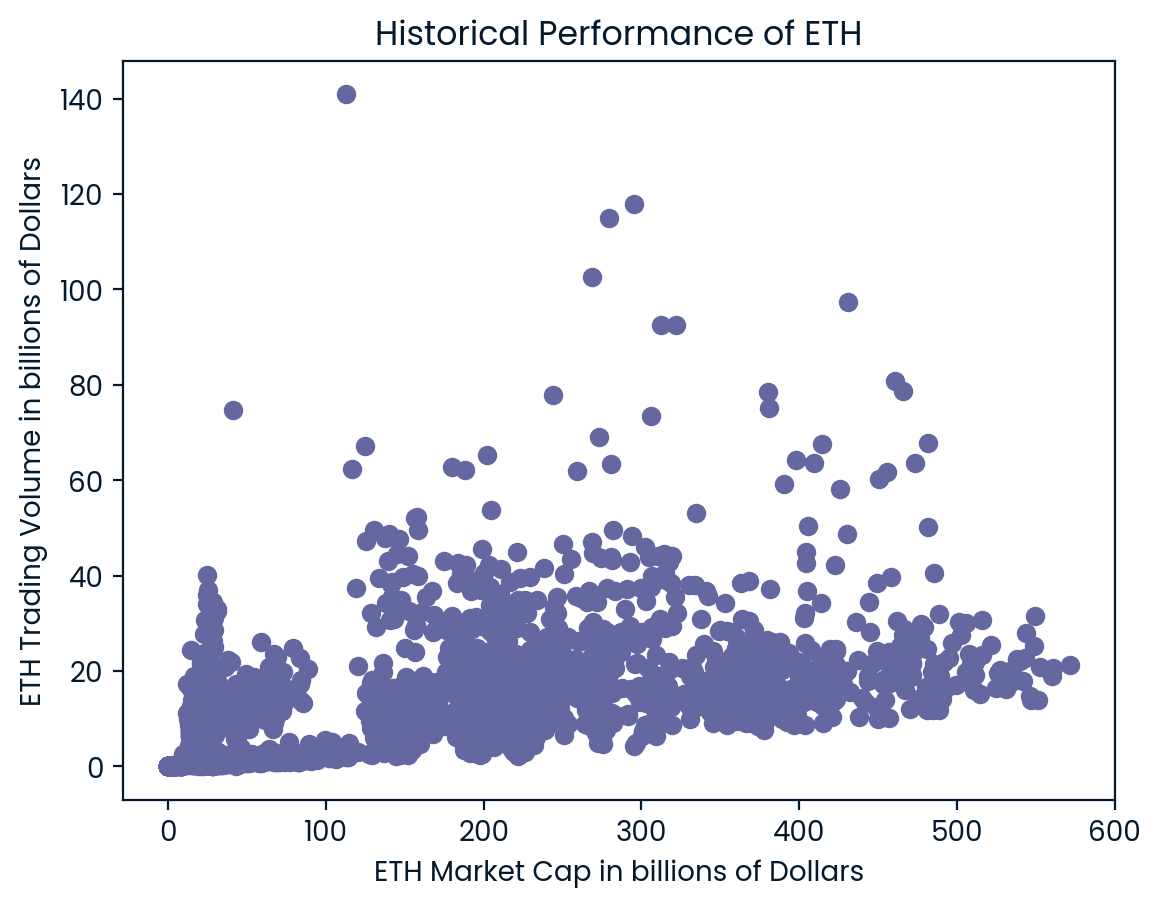

In [47]:
import matplotlib.pyplot as plt
plt.scatter(df['billions_mcap'], df['billions_volume'])
plt.xlabel('ETH Market Cap in billions of Dollars')
plt.ylabel('ETH Trading Volume in billions of Dollars')
plt.title('Historical Performance of ETH')
plt.show()

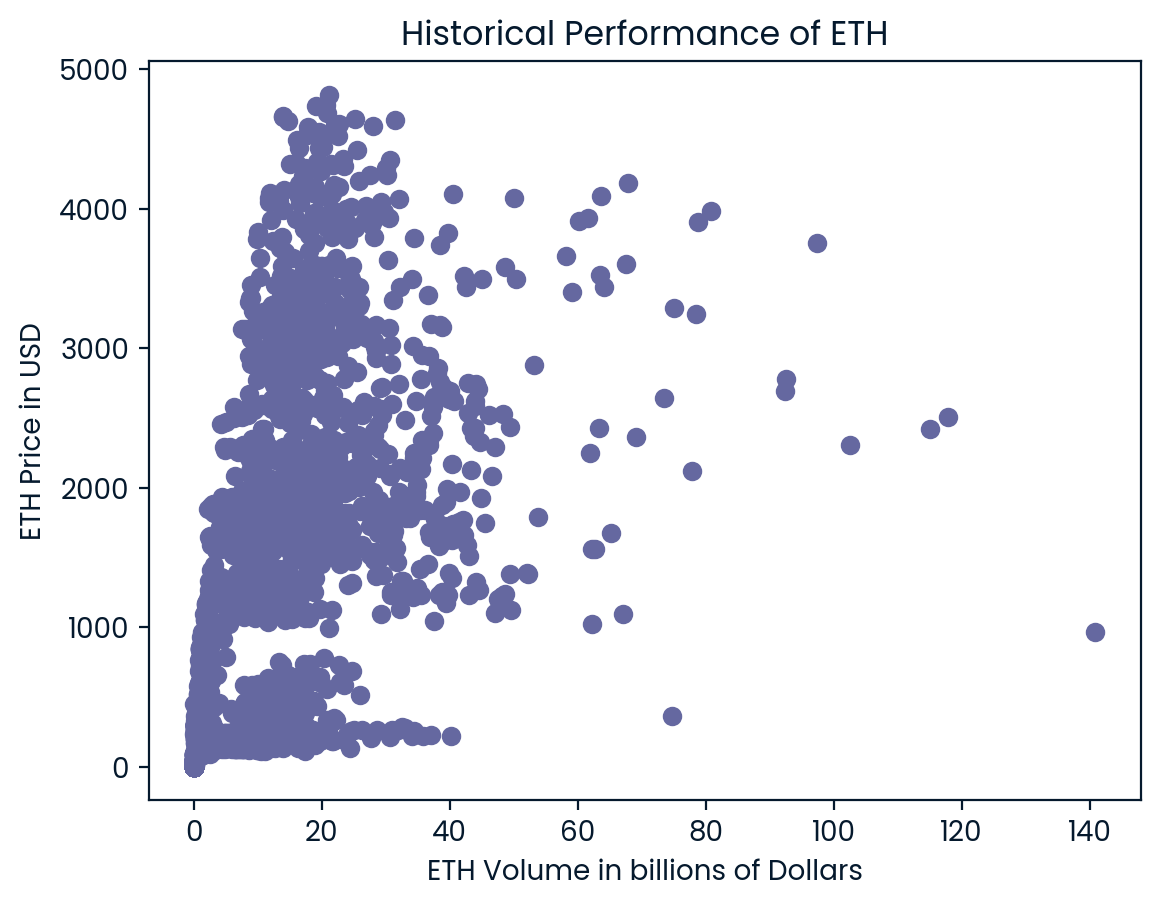

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df['billions_volume'], df['price'])
plt.ylabel('ETH Price in USD')
plt.xlabel('ETH Volume in billions of Dollars')
plt.title('Historical Performance of ETH')
plt.show()